In [17]:
from google.colab import drive
drive.mount('/content/drive')

import os
project_path = '/content/drive/MyDrive/Spring2025/DSGA1019/1019 Project/Code'
os.chdir(project_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!pwd
!ls

/content/drive/.shortcut-targets-by-id/15eos8vm7IWMiPzaW6ROHw_kjgqgFc9fa/1019 Project/Code
build					clean_text_cython.pyx  main.ipynb
clean_text_cython.c			eda.ipynb	       setup.py
clean_text_cython.cpython-38-darwin.so	Fake.csv	       True.csv


## 1.data summary


In [19]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [20]:
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [21]:
df_true['label'] = 1
df_fake['label'] = 0
df = pd.concat([df_true, df_fake], ignore_index=True)
df['label_text'] = df['label'].map({1: 'real', 0: 'fake'})
df.tail()

,title,text,subject,date,label,label_text
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0,fake


In [ ]:
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset shape: 44898 rows × 6 columns


In [ ]:
total_counts = df['label_text'].value_counts()
print("\nTotal articles by label:")
print(total_counts)

valid_date_counts = df[~df['date'].isnull()]['label_text'].value_counts()
print("\nArticles with valid date by label:")
print(valid_date_counts)


Total articles by label:
label_text
fake    23481
real    21417
Name: count, dtype: int64

Articles with valid date by label:
label_text
fake    23481
real    21417
Name: count, dtype: int64


In [ ]:
print("\nMissing values per column:\n")
print(df.isnull().sum())


Missing values per column:

title         0
text          0
subject       0
date          0
label         0
label_text    0
dtype: int64


In [23]:
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')

# Length and word count
df['title_len'] = df['title'].apply(len)
df['text_len'] = df['text'].apply(len)
df['title_words'] = df['title'].apply(lambda x: len(x.split()))
df['text_words'] = df['text'].apply(lambda x: len(x.split()))

print("\nDescriptive statistics (char length):")
print(df[['title_len', 'text_len']].describe())

print("\nDescriptive statistics (word count):")
print(df[['title_words', 'text_words']].describe())


Descriptive statistics (char length):
          title_len      text_len
count  44898.000000  44898.000000
mean      80.111720   2469.109693
std       25.379685   2171.617091
min        8.000000      1.000000
25%       63.000000   1234.000000
50%       73.000000   2186.000000
75%       91.000000   3105.000000
max      286.000000  51794.000000

Descriptive statistics (word count):
        title_words    text_words
count  44898.000000  44898.000000
mean      12.453472    405.282284
std        4.111476    351.265595
min        1.000000      0.000000
25%       10.000000    203.000000
50%       11.000000    362.000000
75%       14.000000    513.000000
max       42.000000   8135.000000


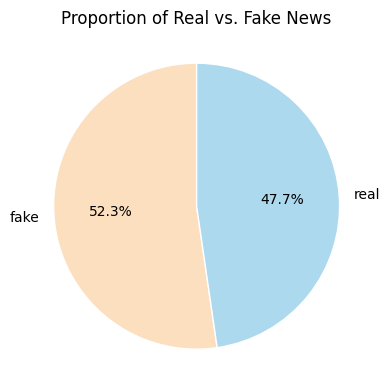

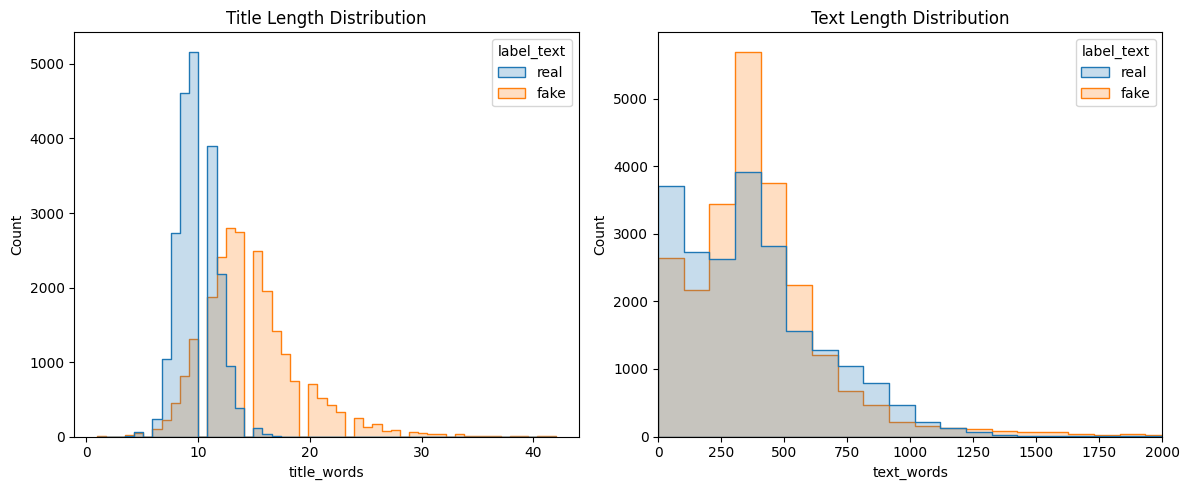

In [32]:
color_map = {
    'real': '#add9ee',
    'fake': '#fcdfbe'
}

# Piechart
label_counts = df['label_text'].value_counts()
pie_colors = [color_map[label] for label in label_counts.index]

plt.figure(figsize=(4, 4))
plt.pie(label_counts,
        labels=label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=pie_colors,
        wedgeprops={'edgecolor': 'white'})
plt.title('Proportion of Real vs. Fake News')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Distribution plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='title_words', hue='label_text', bins=50, ax=axes[0],
             element='step')
axes[0].set_title('Title Length Distribution')

sns.histplot(data=df, x='text_words', hue='label_text', bins=80, ax=axes[1],
             element='step')
axes[1].set_title('Text Length Distribution')
axes[1].set_xlim([0, 2000])

plt.tight_layout()
plt.show()

In [ ]:
print(df['subject'].value_counts(dropna=False))

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


In [ ]:
subject_counts = df.groupby(['subject', 'label_text']).size().reset_index(name='count')
print(subject_counts.head(10))

           subject label_text  count
0  Government News       fake   1570
1      Middle-east       fake    778
2             News       fake   9050
3          US_News       fake    783
4        left-news       fake   4459
5         politics       fake   6841
6     politicsNews       real  11272
7        worldnews       real  10145


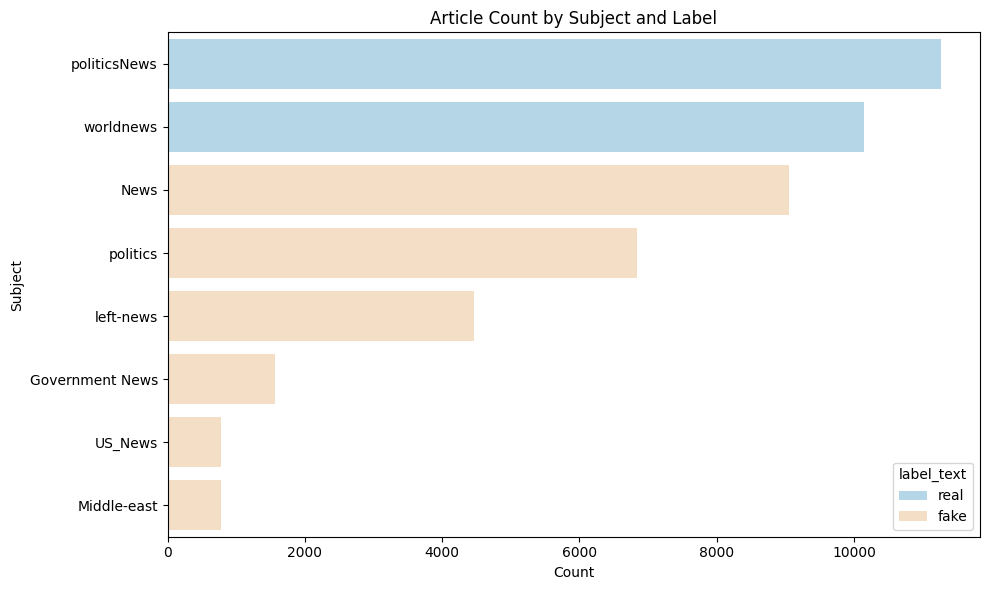

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='subject', order=df['subject'].value_counts().index,
              hue='label_text', palette=color_map)
plt.title("Article Count by Subject and Label")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.tight_layout()
plt.show()


## 2.text-based features

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    words = ''.join([ch if ch.isalpha() or ch == ' ' else ' ' for ch in text]).split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

df['text'] = (df['title'].fillna("") + " " + df['text'].fillna("")).str.strip()
df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


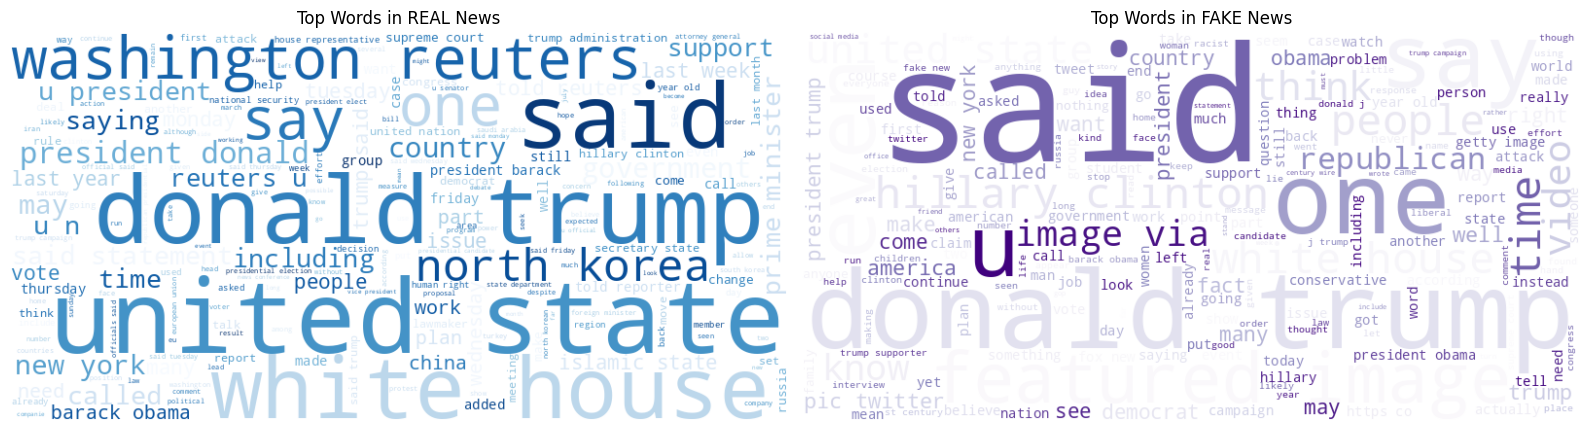

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

real_texts = df[df['label'] == 1]['clean_text']
fake_texts = df[df['label'] == 0]['clean_text']
real_text = ' '.join(real_texts)
fake_text = ' '.join(fake_texts)

wc_real = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(real_text)
wc_fake = WordCloud(width=800, height=400, background_color='white', colormap='Purples').generate(fake_text)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].imshow(wc_real, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Top Words in REAL News")

axes[1].imshow(wc_fake, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Top Words in FAKE News")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(texts, ngram_range=(2, 3), top_n=15):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(texts)
    bag = vec.transform(texts)
    sum_words = bag.sum(axis=0)
    freqs = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_ngrams = sorted(freqs, key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:top_n]

# Get top bigrams/trigrams
top_real_ngrams = get_top_ngrams(df[df['label'] == 1]['clean_text'])
top_fake_ngrams = get_top_ngrams(df[df['label'] == 0]['clean_text'])

print("Top Bigrams/Trigrams in REAL News:")
for phrase, freq in top_real_ngrams:
    print(f"{phrase:<40} {freq}")

print("\nTop Bigrams/Trigrams in FAKE News:")
for phrase, freq in top_fake_ngrams:
    print(f"{phrase:<40} {freq}")


Top Bigrams/Trigrams in REAL News:
united states                            12235
donald trump                             10222
white house                              9209
washington reuters                       6675
north korea                              6379
president donald                         5931
president donald trump                   5870
new york                                 4855
prime minister                           4211
said statement                           3934
islamic state                            3728
trump said                               3563
told reuters                             3495
barack obama                             3344
told reporters                           3176

Top Bigrams/Trigrams in FAKE News:
donald trump                             17197
featured image                           8064
hillary clinton                          7722
white house                              7093
united states                            6696
twitte

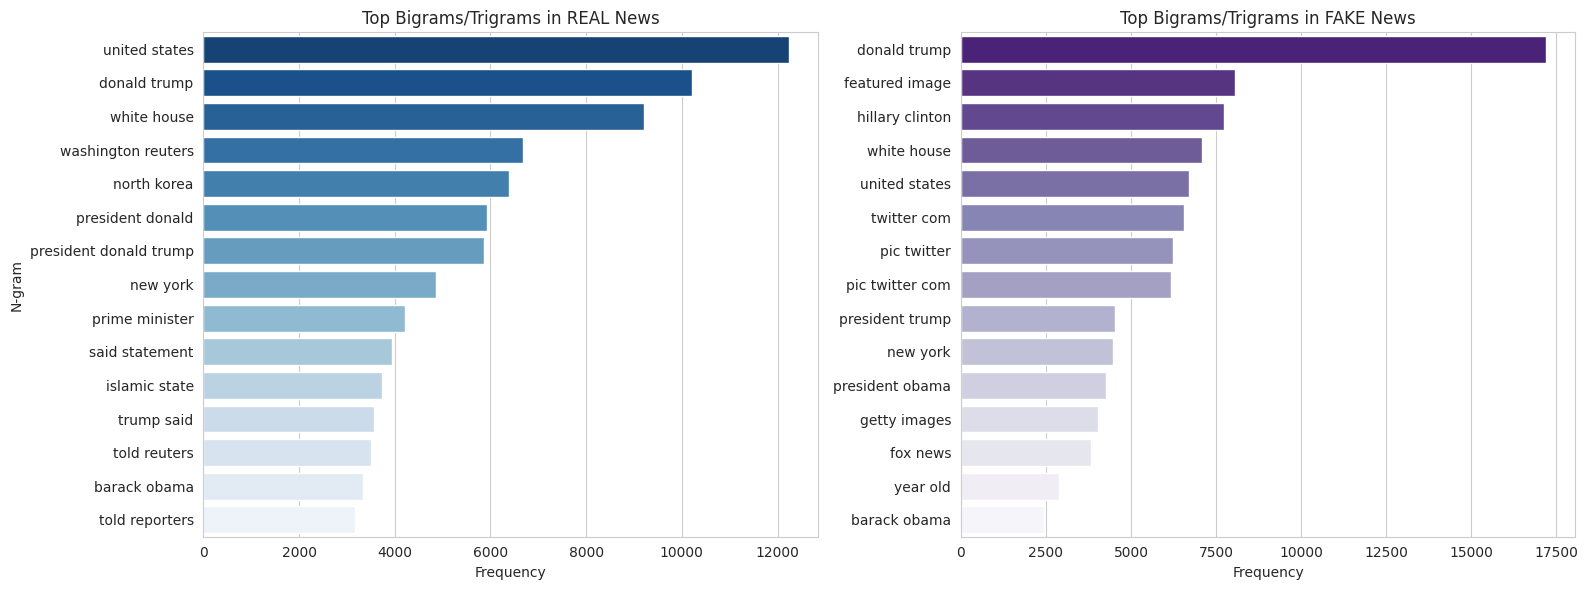

In [ ]:
df_real_ngrams = pd.DataFrame(top_real_ngrams, columns=['ngram', 'count'])
df_fake_ngrams = pd.DataFrame(top_fake_ngrams, columns=['ngram', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=df_real_ngrams, y='ngram', x='count', ax=axes[0], palette='Blues_r')
axes[0].set_title("Top Bigrams/Trigrams in REAL News")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("N-gram")

sns.barplot(data=df_fake_ngrams, y='ngram', x='count', ax=axes[1], palette='Purples_r')
axes[1].set_title("Top Bigrams/Trigrams in FAKE News")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

## 3.temporal analysis

In [ ]:
print(df[df['label'] == 0]['date'].unique()[:5])
print(df[df['label'] == 1]['date'].unique()[:5])

['December 31, 2017' 'December 30, 2017' 'December 29, 2017'
 'December 25, 2017' 'December 23, 2017']
['December 31, 2017 ' 'December 29, 2017 ' 'December 30, 2017 '
 'December 28, 2017 ' 'December 25, 2017 ']


In [ ]:
df['date'] = pd.to_datetime(df['date'].str.strip(), errors='coerce')

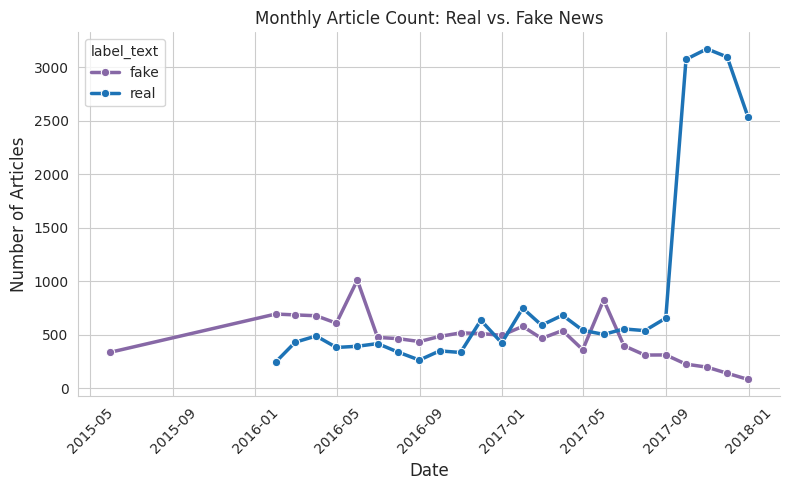

In [ ]:
df['label_text'] = df['label'].map({1: 'real', 0: 'fake'})
df_time = df.dropna(subset=['date'])
time_counts = df_time.groupby([pd.Grouper(key='date', freq='M'), 'label_text']).size().reset_index(name='count')

plt.figure(figsize=(8, 5))

sns.lineplot(
    data=time_counts,
    x='date',
    y='count',
    hue='label_text',
    palette={'real': '#1d73b6', 'fake': '#8768a6'},
    linewidth=2.5,
    marker='o'
)

plt.title('Monthly Article Count: Real vs. Fake News')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.tick_params(axis='both', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()


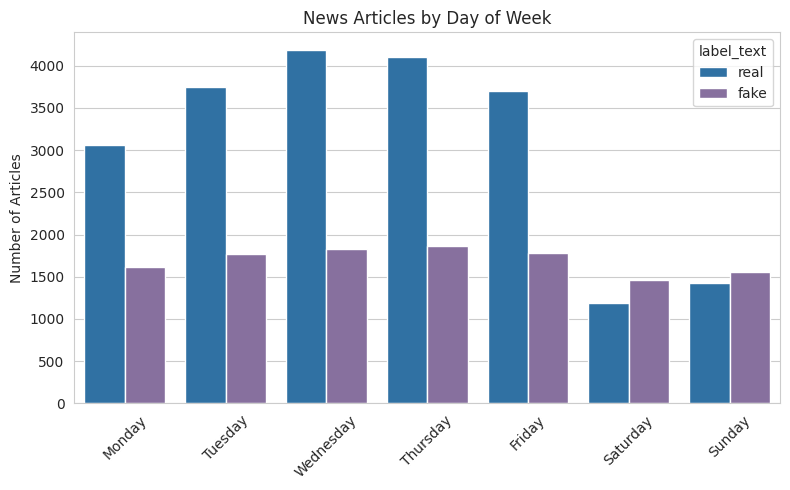

In [ ]:
# Day of week
df_time = df.dropna(subset=['date']).copy()
df_time['day_of_week'] = df_time['date'].dt.day_name()

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_time,
    x='day_of_week',
    hue='label_text',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette={'real': '#1d73b6', 'fake': '#8768a6'}
)
plt.title('News Articles by Day of Week')
plt.xlabel('')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()